In [ ]:
!nvidia-smi

Thu Jun 23 12:30:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Kaggle Setup: First Upload your Kaggle API JSON file

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

### Dataset Download

In [ ]:
!kaggle datasets download gpiosenka/100-bird-species

100% 1.49G/1.49G [00:08<00:00, 196MB/s]
100% 1.49G/1.49G [00:08<00:00, 188MB/s]


In [ ]:
!unzip "100-bird-species.zip" -d "birds_400_species"

Streaming output truncated to the last 5000 lines.
  inflating: birds_400_species/train/VERMILION FLYCATHER/102.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/103.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/104.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/105.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/106.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/107.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/108.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/109.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/110.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/111.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/112.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/113.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/114.jpg  
  inflating: birds_400_species/train/VERMILION FLYCATHER/115.jpg  
  inflating

In [ ]:
# %cd asl_dataset/
!rm birds_400_species/birds\ latin\ names.csv
!rm birds_400_species/EfficientNetB4-BIRDS-0.99.h5
!rm birds_400_species/birds.csv
!rm birds_400_species/class_dict.csv
!rm birds_400_species/my_csv-2-17-2022-1-17-48.csv

### Load Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 128
img_height = 224
img_width = 224
train_directory = 'birds_400_species/train'
val_directory = 'birds_400_species/valid'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  # validation_split=0.2,
  # subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_directory,
  # validation_split=0.2,
  # subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA', 'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BARROWS GOLDENEYE', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIR

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


### CNN 3-Layer Model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
229/229 [==============================] - 79s 307ms/step - loss: 4.8929 - accuracy: 0.0983 - val_loss: 3.3338 - val_accuracy: 0.2765
Epoch 2/10
229/229 [==============================] - 78s 332ms/step - loss: 2.8452 - accuracy: 0.3816 - val_loss: 2.3277 - val_accuracy: 0.4695
Epoch 3/10
229/229 [==============================] - 71s 303ms/step - loss: 1.8194 - accuracy: 0.5813 - val_loss: 2.0056 - val_accuracy: 0.5195
Epoch 4/10
229/229 [==============================] - 71s 304ms/step - loss: 1.0301 - accuracy: 0.7501 - val_loss: 2.1270 - val_accuracy: 0.5415
Epoch 5/10
229/229 [==============================] - 71s 302ms/step - loss: 0.4506 - accuracy: 0.8857 - val_loss: 2.4518 - val_accuracy: 0.5435
Epoch 6/10
229/229 [==============================] - 71s 303ms/step - loss: 0.2004 - accuracy: 0.9465 - val_loss: 2.9242 - val_accuracy: 0.5310
Epoch 7/10
229/229 [==============================] - 70s 301ms/step - loss: 0.1339 - accuracy: 0.9620 - val_loss: 3.0884 - val_ac

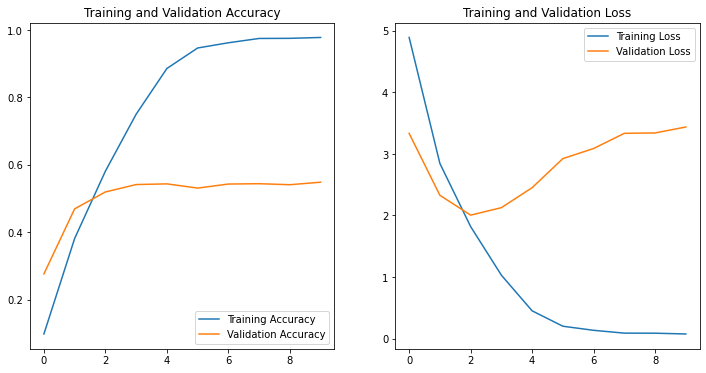

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### CNN 3-Layer With Data Augmentation and Dropout Layer

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
229/229 [==============================] - 74s 312ms/step - loss: 5.2876 - accuracy: 0.0412 - val_loss: 4.1059 - val_accuracy: 0.1540
Epoch 2/25
229/229 [==============================] - 74s 315ms/step - loss: 4.0222 - accuracy: 0.1636 - val_loss: 3.0666 - val_accuracy: 0.3220
Epoch 3/25
229/229 [==============================] - 74s 316ms/step - loss: 3.3607 - accuracy: 0.2688 - val_loss: 2.5978 - val_accuracy: 0.4110
Epoch 4/25
229/229 [==============================] - 74s 317ms/step - loss: 2.9656 - accuracy: 0.3354 - val_loss: 2.8347 - val_accuracy: 0.3745
Epoch 5/25
229/229 [==============================] - 74s 317ms/step - loss: 2.7036 - accuracy: 0.3852 - val_loss: 2.2612 - val_accuracy: 0.4800
Epoch 6/25
229/229 [==============================] - 75s 321ms/step - loss: 2.5052 - accuracy: 0.4226 - val_loss: 1.8685 - val_accuracy: 0.5565
Epoch 7/25
229/229 [==============================] - 75s 319ms/step - loss: 2.3687 - accuracy: 0.4474 - val_loss: 1.9236 - val_ac

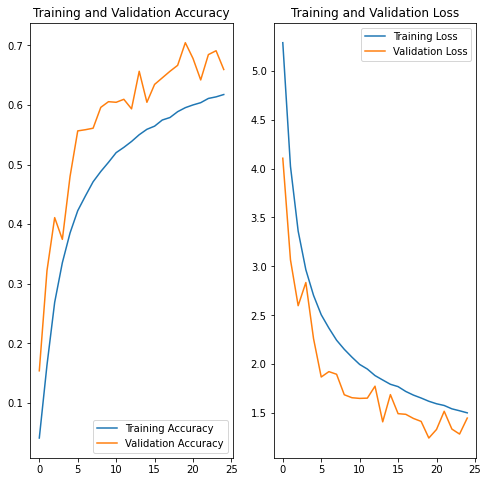

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Transfer Learning With EfficientNetB7

In [ ]:
num_classes = len(class_names)
efficient_preprocess_input = tf.keras.applications.efficientnet.preprocess_input
efficient_base_model = tf.keras.applications.EfficientNetB7(include_top=False,weights="imagenet",input_shape=(img_height,img_width,3))
efficient_base_model.trainable = False

efficient_inputs = efficient_base_model.input
e_x = efficient_preprocess_input(efficient_inputs)
e_x = efficient_base_model(e_x, training=False)
e_x = layers.Flatten()(e_x)
# out = layers.Dense(512, activation='relu')(e_x)
out = layers.Dense(num_classes)(e_x)

In [ ]:
model= tf.keras.Model(inputs=[efficient_inputs],outputs=[out])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 flatten_1 (Flatten)         (None, 125440)            0         
                                                                 
 dense_1 (Dense)             (None, 400)               50176400  
                                                                 
Total params: 114,274,087
Trainable params: 50,176,400
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
457/457 [==============================] - 698s 1s/step - loss: 10.3170 - accuracy: 0.6386 - val_loss: 5.9631 - val_accuracy: 0.8045
Epoch 2/10
457/457 [==============================] - 666s 1s/step - loss: 3.3028 - accuracy: 0.8718 - val_loss: 4.8046 - val_accuracy: 0.8550
Epoch 3/10
457/457 [==============================] - 667s 1s/step - loss: 2.3224 - accuracy: 0.9123 - val_loss: 4.4701 - val_accuracy: 0.8710
Epoch 4/10
457/457 [==============================] - 666s 1s/step - loss: 1.9044 - accuracy: 0.9320 - val_loss: 5.3240 - val_accuracy: 0.8750
Epoch 5/10
457/457 [==============================] - 666s 1s/step - loss: 1.6555 - accuracy: 0.9436 - val_loss: 5.2569 - val_accuracy: 0.8785
Epoch 6/10
457/457 [==============================] - 666s 1s/step - loss: 1.5380 - accuracy: 0.9493 - val_loss: 5.5819 - val_accuracy: 0.8905
Epoch 7/10
457/457 [==============================] - 666s 1s/step - loss: 1.4742 - accuracy: 0.9543 - val_loss: 5.7369 - val_accuracy: 0.892

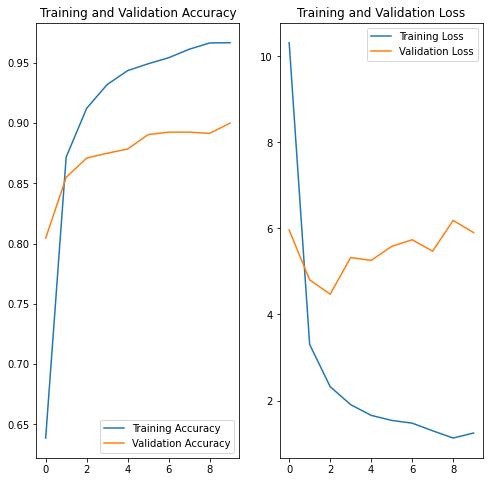

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Transfer Learing Using Pretrained EfficientNetB2 and Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = len(class_names)
efficient_preprocess_input = tf.keras.applications.efficientnet.preprocess_input
efficient_base_model = tf.keras.applications.EfficientNetB2(include_top=False,weights="imagenet",input_shape=(img_height,img_width,3))
efficient_base_model.trainable = False

efficient_inputs = efficient_base_model.input
x = data_augmentation(efficient_inputs)
e_x = efficient_preprocess_input(x)
e_x = efficient_base_model(e_x, training=False)
e_x = layers.Flatten()(e_x)
out = layers.Dense(num_classes)(e_x)

In [ ]:
model= tf.keras.Model(inputs=[efficient_inputs],outputs=[out])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_5 (Flatten)         (None, 68992)             0         
                                                                 
 dense_5 (Dense)             (None, 400)               27597200  
                                                                 
Total params: 35,365,769
Trainable params: 27,597,200
Non-trainable params: 7,768,569
_________________________________________________________________


In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
229/229 [==============================] - 183s 758ms/step - loss: 3.9777 - accuracy: 0.6684 - val_loss: 1.5650 - val_accuracy: 0.8640
Epoch 2/10
229/229 [==============================] - 171s 741ms/step - loss: 2.0729 - accuracy: 0.8373 - val_loss: 1.3433 - val_accuracy: 0.8880
Epoch 3/10
229/229 [==============================] - 172s 743ms/step - loss: 1.6900 - accuracy: 0.8783 - val_loss: 1.3394 - val_accuracy: 0.9035
Epoch 4/10
229/229 [==============================] - 175s 759ms/step - loss: 1.4093 - accuracy: 0.9023 - val_loss: 1.3261 - val_accuracy: 0.9195
Epoch 5/10
229/229 [==============================] - 172s 747ms/step - loss: 1.2482 - accuracy: 0.9156 - val_loss: 1.6310 - val_accuracy: 0.9110
Epoch 6/10
229/229 [==============================] - 172s 746ms/step - loss: 1.0673 - accuracy: 0.9268 - val_loss: 1.3360 - val_accuracy: 0.9310
Epoch 7/10
229/229 [==============================] - 172s 745ms/step - loss: 1.0786 - accuracy: 0.9337 - val_loss: 1.4941 -

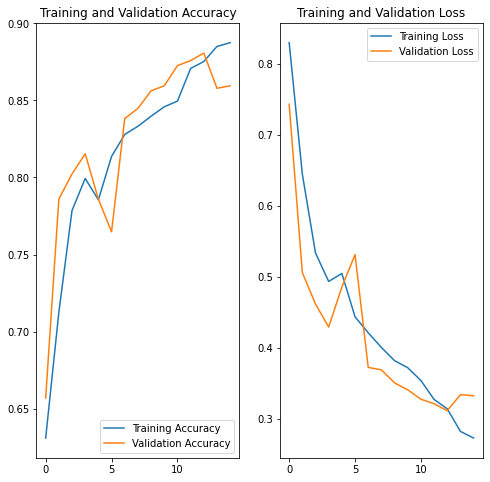

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Transfer Learing Using Pretrained EfficientNetB2 and Data Augmentation, But Without Preprocess Input

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = len(class_names)
efficient_preprocess_input = tf.keras.applications.efficientnet.preprocess_input
efficient_base_model = tf.keras.applications.EfficientNetB2(include_top=False,weights="imagenet",input_shape=(img_height,img_width,3))
efficient_base_model.trainable = False

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = efficient_base_model(x, training=False)
x = layers.Flatten()(x)
out = layers.Dense(num_classes)(x)

In [ ]:
model= tf.keras.Model(inputs=[inputs],outputs=[out])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_2 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 400)               27597200  
                                                                 
Total params: 35,365,769
Trainable params: 27,597,200
Non-trainable params: 7,768,569
_________________________________________________________________


In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
229/229 [==============================] - 186s 772ms/step - loss: 3.9796 - accuracy: 0.6663 - val_loss: 1.5297 - val_accuracy: 0.8610
Epoch 2/10
229/229 [==============================] - 170s 737ms/step - loss: 2.1126 - accuracy: 0.8387 - val_loss: 1.2821 - val_accuracy: 0.8935
Epoch 3/10
229/229 [==============================] - 170s 737ms/step - loss: 1.6696 - accuracy: 0.8785 - val_loss: 1.3466 - val_accuracy: 0.9025
Epoch 4/10
229/229 [==============================] - 170s 736ms/step - loss: 1.3827 - accuracy: 0.9041 - val_loss: 1.2282 - val_accuracy: 0.9160
Epoch 5/10
229/229 [==============================] - 170s 736ms/step - loss: 1.2218 - accuracy: 0.9167 - val_loss: 1.2813 - val_accuracy: 0.9275
Epoch 6/10
229/229 [==============================] - 170s 737ms/step - loss: 1.1153 - accuracy: 0.9262 - val_loss: 1.2856 - val_accuracy: 0.9285
Epoch 7/10
229/229 [==============================] - 170s 737ms/step - loss: 1.0211 - accuracy: 0.9351 - val_loss: 1.4071 -

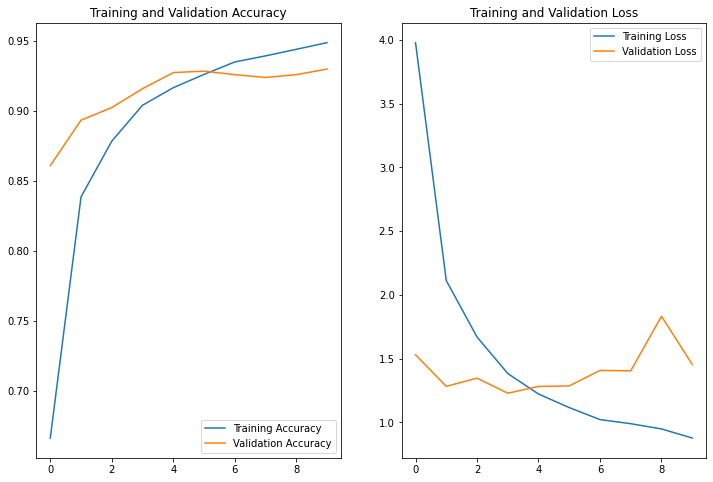

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Inferencing

In [ ]:
data_path = 'asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg'

In [ ]:
img = tf.keras.utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to a with a 99.19 percent confidence.
